# ANN - Annual Income Analysis

## Import libaries :

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import *
import tensorflow.keras 
from tensorflow.keras import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

## Load and Explore Data :

In [2]:
ai = pd.read_csv('income.csv')

In [3]:
ai.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,40,Self-emp-not-inc,223881,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,70,United-States,>50K
1,30,Private,149118,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Female,0,0,40,United-States,<=50K
2,46,Private,109209,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,>50K
3,32,Private,229566,Assoc-voc,11,Married-civ-spouse,Other-service,Husband,White,Male,0,0,60,United-States,>50K
4,54,?,148657,Preschool,1,Married-civ-spouse,?,Wife,White,Female,0,0,40,Mexico,<=50K


In [4]:
ai.shape

(25000, 15)

In [5]:
ai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             25000 non-null  int64 
 1   workclass       25000 non-null  object
 2   fnlwgt          25000 non-null  int64 
 3   education       25000 non-null  object
 4   education.num   25000 non-null  int64 
 5   marital.status  25000 non-null  object
 6   occupation      25000 non-null  object
 7   relationship    25000 non-null  object
 8   race            25000 non-null  object
 9   sex             25000 non-null  object
 10  capital.gain    25000 non-null  int64 
 11  capital.loss    25000 non-null  int64 
 12  hours.per.week  25000 non-null  int64 
 13  native.country  25000 non-null  object
 14  income          25000 non-null  object
dtypes: int64(6), object(9)
memory usage: 2.9+ MB


In [6]:
ai.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,25000.00000,2.500000e+04,25000.000000,25000.000000,25000.000000,25000.000000
mean,38.60916,1.896611e+05,10.076320,1083.144040,87.489800,40.442800
std,13.68660,1.054713e+05,2.576967,7321.971568,402.830246,12.309706
min,17.00000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.00000,1.179830e+05,9.000000,0.000000,0.000000,40.000000
50%,37.00000,1.782110e+05,10.000000,0.000000,0.000000,40.000000
75%,48.00000,2.370682e+05,12.000000,0.000000,0.000000,45.000000
max,90.00000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
ai.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [8]:
ai.duplicated().sum()

12

## Data preprocessing :

In [9]:
ai.drop_duplicates(inplace=True)

In [10]:
ai.shape

(24988, 15)

In [11]:
ai.drop(['fnlwgt','education','relationship'],axis = 1, inplace = True)

In [12]:
ai.head()

,age,workclass,education.num,marital.status,occupation,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,40,Self-emp-not-inc,15,Married-civ-spouse,Prof-specialty,White,Male,99999,0,70,United-States,>50K
1,30,Private,9,Divorced,Craft-repair,White,Female,0,0,40,United-States,<=50K
2,46,Private,10,Married-civ-spouse,Adm-clerical,White,Male,0,0,40,United-States,>50K
3,32,Private,11,Married-civ-spouse,Other-service,White,Male,0,0,60,United-States,>50K
4,54,?,1,Married-civ-spouse,?,White,Female,0,0,40,Mexico,<=50K


In [13]:
ai.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24988 entries, 0 to 24999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             24988 non-null  int64 
 1   workclass       24988 non-null  object
 2   education.num   24988 non-null  int64 
 3   marital.status  24988 non-null  object
 4   occupation      24988 non-null  object
 5   race            24988 non-null  object
 6   sex             24988 non-null  object
 7   capital.gain    24988 non-null  int64 
 8   capital.loss    24988 non-null  int64 
 9   hours.per.week  24988 non-null  int64 
 10  native.country  24988 non-null  object
 11  income          24988 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.5+ MB


### Encoding :

In [14]:
ai.select_dtypes(include='object').nunique()

workclass          9
marital.status     7
occupation        15
race               5
sex                2
native.country    41
income             2
dtype: int64

In [15]:
le = LabelEncoder()

In [16]:
cols = ['income','marital.status','native.country','occupation','workclass']
for col in cols :
    ai[col] = le.fit_transform(ai[col])

In [17]:
ai =pd.get_dummies(ai,columns =['race','sex'],drop_first=True)

In [18]:
ai.head()

,age,workclass,education.num,marital.status,occupation,capital.gain,capital.loss,hours.per.week,native.country,income,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male
0,40,6,15,2,10,99999,0,70,38,1,False,False,False,True,True
1,30,4,9,0,3,0,0,40,38,0,False,False,False,True,False
2,46,4,10,2,1,0,0,40,38,1,False,False,False,True,True
3,32,4,11,2,8,0,0,60,38,1,False,False,False,True,True
4,54,0,1,2,0,0,0,40,25,0,False,False,False,True,False


In [19]:
# Check outliers
num_cols = ['age','education.num','capital.gain','capital.loss','hours.per.week']
for col in num_cols:
    print((np.abs(stats.zscore(ai[num_cols]))>3).any())

True
True
True
True
True


## EDA 

C:\Users\OM\AppData\Local\Temp\ipykernel_2564\4052673006.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='income',data = ai,palette='Set2')


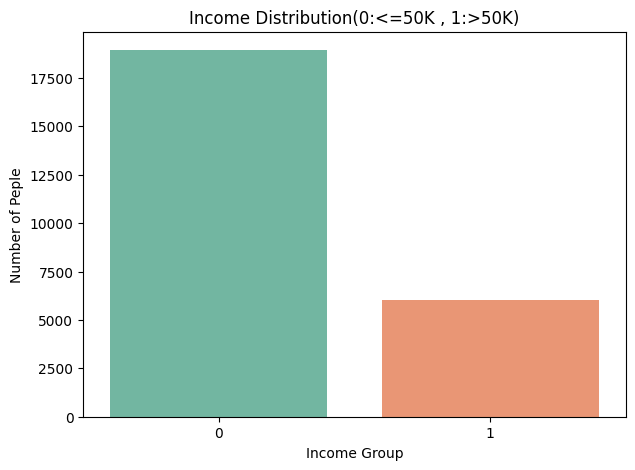

In [20]:
plt.figure(figsize =(7,5))
sns.countplot(x='income',data = ai,palette='Set2')
plt.title('Income Distribution(0:<=50K , 1:>50K)')
plt.xlabel('Income Group')
plt.ylabel('Number of Peple')
plt.show()

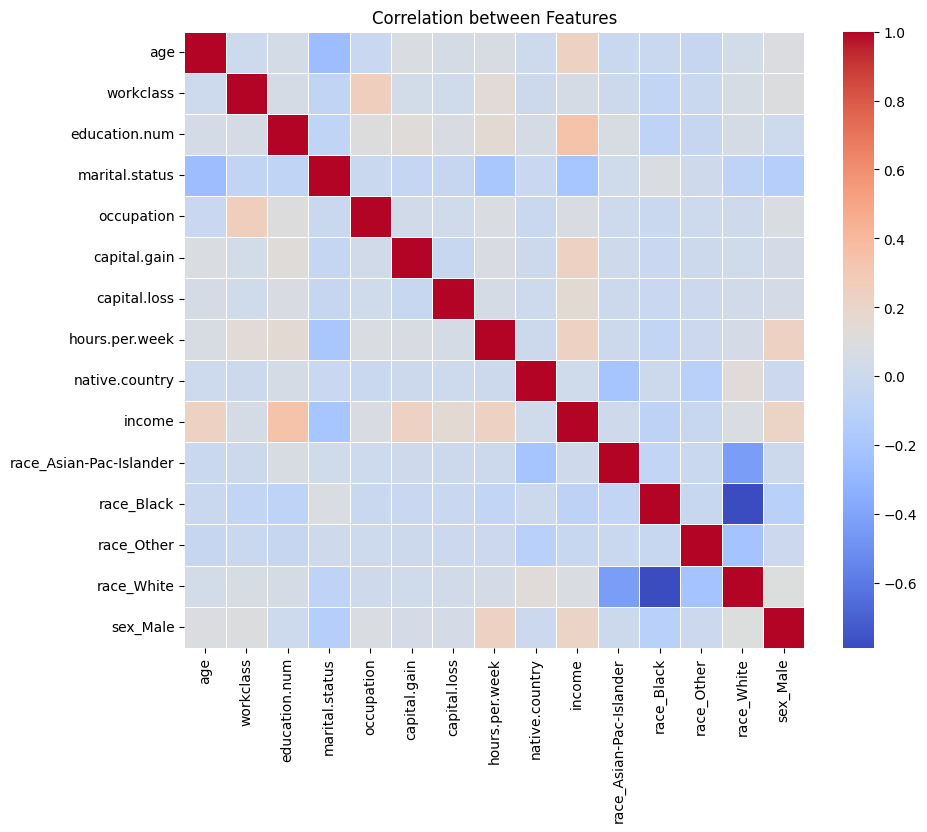

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(ai.corr(),annot=False,cmap = 'coolwarm',linewidths=0.5)
plt.title('Correlation between Features')
plt.show()

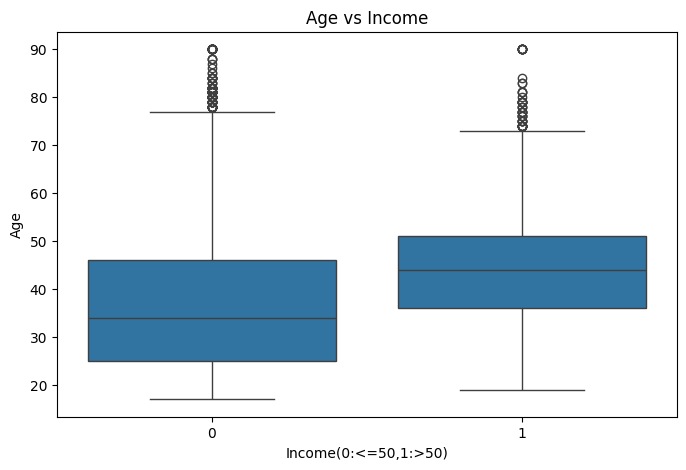

In [22]:
plt.figure(figsize=(8,5))
sns.boxplot(x='income',y='age',data=ai)
plt.title('Age vs Income')
plt.xlabel('Income(0:<=50,1:>50)')
plt.ylabel('Age')
plt.show()

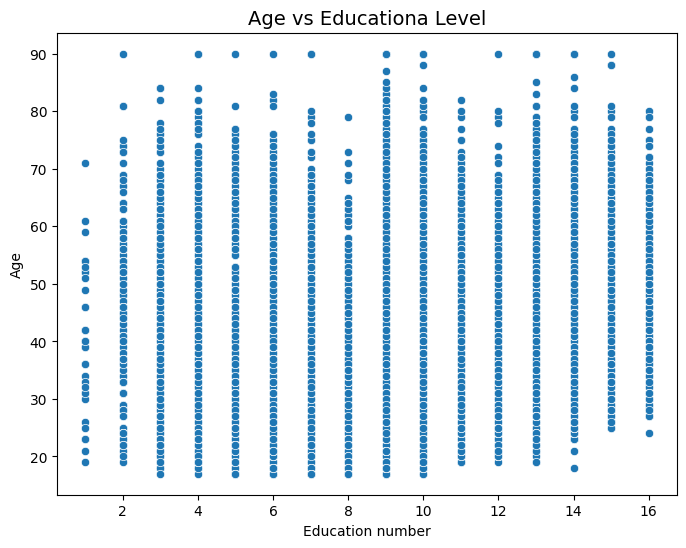

In [23]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='education.num',y='age',data=ai)
plt.title('Age vs Educationa Level',fontsize=14)
plt.xlabel('Education number')
plt.ylabel('Age')
plt.show()

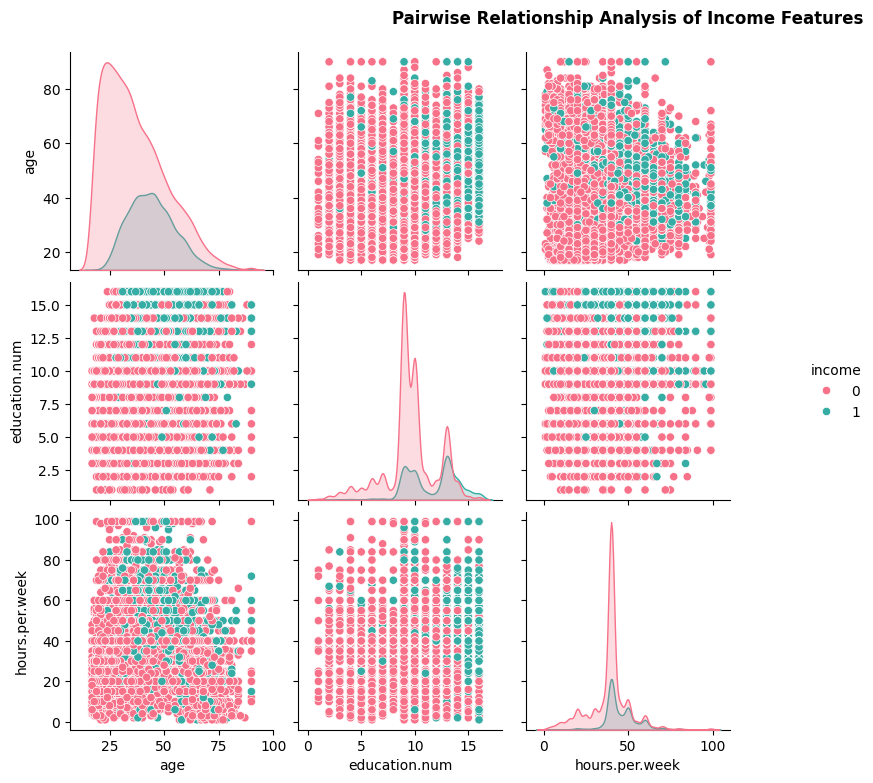

In [24]:
cols = ['age','education.num','hours.per.week','income']
sns.pairplot(ai[cols],hue='income',palette='husl')
plt.title('Pairwise Relationship Analysis of Income Features',fontweight='bold',y=3.2)
plt.show()

## Seaparate Features & Target :

In [25]:
X = ai.drop('income',axis=1)
Y = ai['income']

In [26]:
X.head()

,age,workclass,education.num,marital.status,occupation,capital.gain,capital.loss,hours.per.week,native.country,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male
0,40,6,15,2,10,99999,0,70,38,False,False,False,True,True
1,30,4,9,0,3,0,0,40,38,False,False,False,True,False
2,46,4,10,2,1,0,0,40,38,False,False,False,True,True
3,32,4,11,2,8,0,0,60,38,False,False,False,True,True
4,54,0,1,2,0,0,0,40,25,False,False,False,True,False


In [27]:
Y.head()

0    1
1    0
2    1
3    1
4    0
Name: income, dtype: int32

## Train Test Split :

In [28]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=5)

## Scaling :

In [29]:
scaler = StandardScaler()

In [30]:
X_train= scaler.fit_transform(X_train) 
X_test= scaler.transform(X_test)

## Prepare Model Structure :

In [31]:
ann = Sequential()  #model initialize(input layer)
ann.add(Dense(32,activation='relu'))  # Add First Hidden Layer
ann.add(Dense(16,activation='relu'))  # Second Hidden Layer
ann.add(Dense(8,activation='relu'))   # Third Hidden Layer
ann.add(Dense(1,activation='sigmoid')) # Output layer

## Model Compile :

In [32]:
ann.compile(optimizer=Adam(learning_rate=0.001),
           loss='binary_crossentropy',
           metrics=['accuracy'])

## Model Training :

In [33]:
ann.fit(X_train,Y_train,epochs=30,batch_size=32)

Epoch 1/30


625/625 [==============================] - 6s 4ms/step - loss: 0.3980 - accuracy: 0.8149
Epoch 2/30
625/625 [==============================] - 2s 4ms/step - loss: 0.3359 - accuracy: 0.8426
Epoch 3/30
625/625 [==============================] - 3s 4ms/step - loss: 0.3278 - accuracy: 0.8458
Epoch 4/30
625/625 [==============================] - 2s 4ms/step - loss: 0.3237 - accuracy: 0.8482
Epoch 5/30
625/625 [==============================] - 2s 4ms/step - loss: 0.3206 - accuracy: 0.8493
Epoch 6/30
625/625 [==============================] - 3s 5ms/step - loss: 0.3186 - accuracy: 0.8486
Epoch 7/30
625/625 [==============================] - 3s 5ms/step - loss: 0.3175 - accuracy: 0.8514
Epoch 8/30
625/625 [==============================] - 3s 5ms/step - loss: 0.3154 - accuracy: 0.8521
Epoch 9/30
625/625 [==============================] - 3s 4ms/step - loss: 0.3143 - accuracy: 0.8517
Epoch 10/30
625/625 [==============================] - 3s 4ms/step - loss: 0.3126 - accuracy: 0.85

## Model Prediction :

In [34]:
y_pred = ann.predict(X_test)
y_pred = (y_pred>0.5).astype(int)

157/157 [==============================] - 1s 4ms/step


## Model Evaluation :

In [35]:
score = accuracy_score(Y_test,y_pred)
print('Final Accuracy of Model is ',score)

Final Accuracy of Model is  0.8427370948379351


In [38]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90      3714
           1       0.73      0.62      0.67      1284

    accuracy                           0.84      4998
   macro avg       0.80      0.77      0.78      4998
weighted avg       0.84      0.84      0.84      4998



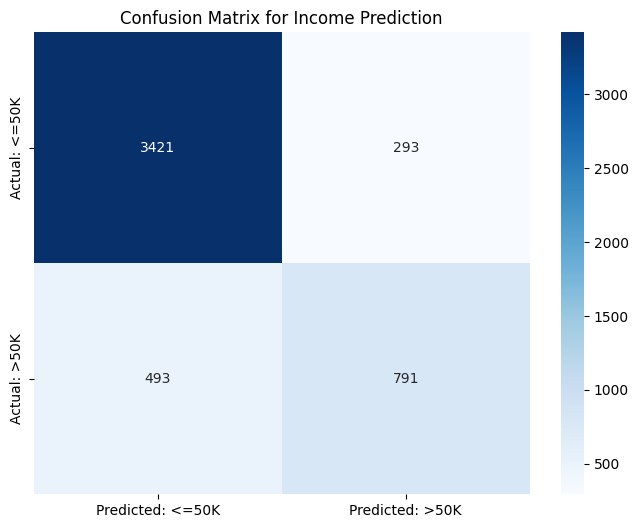

In [41]:
cm = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted: <=50K', 'Predicted: >50K'],
            yticklabels=['Actual: <=50K', 'Actual: >50K'])
plt.title('Confusion Matrix for Income Prediction')
plt.show()

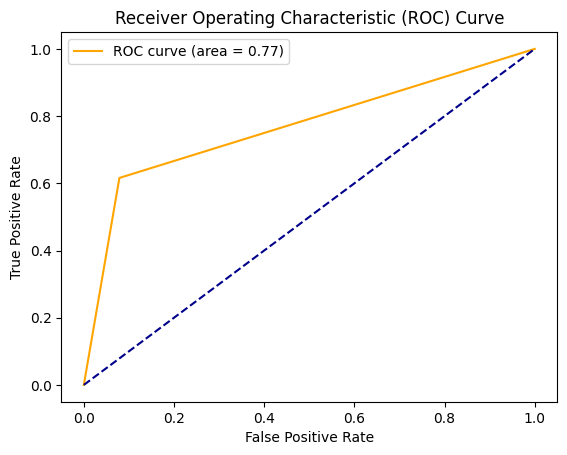

In [46]:
## ROC CURVE
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr, tpr)
# Plot 
plt.plot(fpr, tpr, color='orange', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()